In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import pandas as pd
import h5py
import os
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image, display_png
import csv
#import pydotplus as pdp

from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

/usr/local/pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#読み込み時の型してい
dic_type={}
dic_type[1]="str"
dic_type[2]="str"
for i in range(3,11691):
    dic_type[2]="float64"

In [3]:
#でーた読み込み
ft4=np.load("train.npy")
df4=np.load("test.npy")

In [4]:
#値の標準化
def zscore_wd(x, axis = None):
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore

In [5]:
def zscore(x, axis = None):
    xmean = x.mean(axis=axis)#, keepdims=True)
    xstd  = np.std(x, axis=axis)#, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore

In [6]:
ft4_1=zscore_wd(ft4,axis=1)

In [7]:
del ft4

In [8]:
#くれんデータ分割
X_train, X_test, y_train, y_test =train_test_split(ft4_1,df4)
#print(ft3.shape,X_train.shape,y_train.shape)
#print(ft3.shape,X_train.shape,y_train.shape)

In [9]:
#モデル作成
from keras.models import Sequential,optimizers
from keras.layers import Dense,Activation,Dropout
opt=optimizers.SGD(lr=0.01)
#opt=optimizers.rmsprop(lr=0.001)
X_train,X_valid=np.split(X_train,[6000])
y_train,y_valid=np.split(y_train,[6000])
model1=Sequential()
model1.add(Dropout(0.05,input_shape=(56202,)))
model1.add(Dense(2048))
#model1.add(Dense(2048,activation='relu'))
#model1.add(Dense(2048,activation='relu'))
#model1.add(Dense(1024,activation='relu'))
#model1.add(Dense(1024,activation='relu'))
model1.add(Dense(1024,activation='relu'))
#model1.add(Dense(1024,activation='relu'))
#model1.add(Dense(512,activation='relu'))
#model1.add(Dense(512,activation='relu'))
model1.add(Dense(512,activation='relu'))
#model1.add(Dense(256,activation='relu'))
#model1.add(Dense(256,activation='relu'))
model1.add(Dense(256,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(30))
model1.add(Activation("softmax"))
model1.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
fit=model1.fit(X_train,y_train,epochs=100,batch_size=512,verbose=2,validation_data=(X_valid,y_valid),callbacks=[])
score=model1.evaluate(X_test,y_test,batch_size=64)

Using TensorFlow backend.
/usr/local/pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Train on 6000 samples, validate on 2766 samples
Epoch 1/100
 - 5s - loss: 4.6313 - acc: 0.1155 - val_loss: 3.2209 - val_acc: 0.1504
Epoch 2/100
 - 2s - loss: 2.8697 - acc: 0.2878 - val_loss: 2.3862 - val_acc: 0.3134
Epoch 3/100
 - 3s - loss: 2.4890 - acc: 0.3663 - val_loss: 2.0688 - val_acc: 0.4711
Epoch 4/100
 - 3s - loss: 2.0027 - acc: 0.4633 - val_loss: 1.9918 - val_acc: 0.4646
Epoch 5/100
 - 3s - loss: 1.6103 - acc: 0.5627 - val_loss: 1.2663 - val_acc: 0.7209
Epoch 6/100
 - 3s - loss: 1.4413 - acc: 0.6128 - val_loss: 1.4359 - val_acc: 0.6114
Epoch 7/100
 - 3s - loss: 1.2592 - acc: 0.6615 - val_loss: 0.9458 - val_acc: 0.7874
Epoch 8/100
 - 3s - loss: 1.0778 - acc: 0.7087 - val_loss: 1.0415 - val_acc: 0.7238
Epoch 9/100
 - 3s - loss: 1.0011 - acc: 0.7257 - val_loss: 0.8702 - val_acc: 0.7462
Epoch 10/100
 - 3s - loss: 0.8058 - acc: 0.7758 - val_loss: 0.6152 - val_acc: 0.8496
Epoch 11/100
 - 3s - loss: 0.8151 - acc: 0.7682 - val_loss: 0.7639 - val_acc: 0.7534
Epoch 12/100
 - 3s - loss:

Epoch 97/100
 - 3s - loss: 0.1438 - acc: 0.9562 - val_loss: 0.1543 - val_acc: 0.9544
Epoch 98/100
 - 3s - loss: 0.1287 - acc: 0.9598 - val_loss: 0.1587 - val_acc: 0.9534
Epoch 99/100
 - 3s - loss: 0.1474 - acc: 0.9540 - val_loss: 0.1779 - val_acc: 0.9299
Epoch 100/100
 - 3s - loss: 0.1336 - acc: 0.9582 - val_loss: 0.1367 - val_acc: 0.9555
2922/2922 [==============================] - 1s 262us/step


In [10]:
pred_y=model1.predict(X_test)

In [11]:
np.sum(np.argmax(pred_y,axis=1)==np.argmax(y_test,axis=1))/pred_y.shape[0]

0.9579055441478439

In [12]:
y_test[10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
del ft4_1

In [14]:
del X_train

In [15]:
#以下疾患データにAPPLY
ft2=pd.read_table("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct", sep="\t", header=2,dtype=dic_type)

In [16]:
ft2.iloc[:,2:]=zscore(ft2.iloc[:,2:])

In [17]:
#DATAの.以下を削除（VERSION情報を削除）
ft2.iloc[:,0]=ft2.iloc[:,0].str[:15]

In [25]:
ft2

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
0,ENSG00000223972,DDX11L1,-0.082987,-0.058305,-0.051023,-0.050938,-0.031879,-0.036824,-0.046011,-0.064201,...,-0.007404,-0.023319,-0.012711,-0.010912,-0.019300,-0.013588,-0.032820,-0.012237,-0.016445,-0.026980
1,ENSG00000227232,WASH7P,0.016926,-0.022307,-0.002995,-0.027579,-0.018158,-0.017474,-0.019980,-0.015354,...,-0.005800,-0.006162,-0.008807,-0.007362,-0.010537,-0.007907,-0.010035,-0.003707,-0.009147,-0.007695
2,ENSG00000243485,MIR1302-11,-0.082743,-0.058475,-0.050949,-0.051004,-0.031774,-0.036920,-0.045736,-0.063786,...,-0.007408,-0.023464,-0.012786,-0.010847,-0.020043,-0.014089,-0.032945,-0.012531,-0.016621,-0.027120
3,ENSG00000237613,FAM138A,-0.083258,-0.058687,-0.050999,-0.050911,-0.031879,-0.036920,-0.045867,-0.064065,...,-0.007442,-0.023422,-0.012733,-0.010892,-0.020043,-0.014076,-0.033045,-0.012493,-0.016637,-0.027150
4,ENSG00000268020,OR4G4P,-0.083494,-0.058687,-0.051084,-0.051004,-0.031879,-0.036920,-0.045803,-0.064337,...,-0.007442,-0.023512,-0.012786,-0.010912,-0.020043,-0.014140,-0.032883,-0.012531,-0.016665,-0.027136
5,ENSG00000240361,OR4G11P,-0.083494,-0.058340,-0.050864,-0.051004,-0.031879,-0.036833,-0.046090,-0.064541,...,-0.007415,-0.023434,-0.012752,-0.010912,-0.020043,-0.014140,-0.032963,-0.012531,-0.016629,-0.027202
6,ENSG00000186092,OR4F5,-0.083494,-0.058687,-0.051084,-0.051004,-0.031703,-0.036920,-0.046090,-0.064541,...,-0.007442,-0.023432,-0.012751,-0.010912,-0.020043,-0.014140,-0.032961,-0.012531,-0.016591,-0.027202
7,ENSG00000238009,RP11-34P13.7,-0.082372,-0.058449,-0.050482,-0.050340,-0.031800,-0.036761,-0.045430,-0.063696,...,-0.007404,-0.022480,-0.012475,-0.010864,-0.019518,-0.014026,-0.032485,-0.012486,-0.016582,-0.026988
8,ENSG00000233750,CICP27,-0.082617,-0.057381,-0.050827,-0.050438,-0.031767,-0.036807,-0.045828,-0.064327,...,-0.007342,-0.021741,-0.011556,-0.010864,-0.018940,-0.013815,-0.021154,-0.012399,-0.015030,-0.024695
9,ENSG00000237683,AL627309.1,-0.039070,-0.030180,-0.044233,0.039608,-0.021199,-0.023701,-0.005033,-0.058690,...,0.028562,0.274333,0.191441,0.015378,0.429182,0.036084,0.455581,0.023519,0.183863,0.432192


In [26]:
import collections
import matplotlib.pyplot as plt
tsv=pd.read_csv("patient_data/TCGA-GBM.htseq_fpkm.tsv", delimiter="\t")
#change FPKM to TPM
tsv.iloc[:,1:]=1000000*tsv.iloc[:,1:]/tsv.iloc[:,1:].sum()
tsv.iloc[:,1:]=zscore(tsv.iloc[:,1:])
tsv.iloc[:,0]=tsv.iloc[:,0].str[:15]

merge_tsv=pd.merge(ft2,tsv, right_on='Ensembl_ID', left_on='Name', how='left')
#print(merge_tsv.shape)
#（先に正規化し）欠損値補完e
merge_tsv2=merge_tsv.transpose()
#print(merge_tsv2.isnull().any().sum())
del merge_tsv
merged_tsv3=merge_tsv2.fillna(merge_tsv2.iloc[2:ft2.shape[1],:].mean())#,inplace=True)

In [27]:
tsv

,Ensembl_ID,TCGA-02-0047-01A,TCGA-02-0055-01A,TCGA-02-2483-01A,TCGA-02-2485-01A,TCGA-02-2486-01A,TCGA-06-0125-01A,TCGA-06-0125-02A,TCGA-06-0129-01A,TCGA-06-0130-01A,...,TCGA-41-3915-01A,TCGA-41-4097-01A,TCGA-41-5651-01A,TCGA-76-4925-01A,TCGA-76-4926-01B,TCGA-76-4927-01A,TCGA-76-4928-01B,TCGA-76-4929-01A,TCGA-76-4931-01A,TCGA-76-4932-01A
0,ENSG00000242268,0.328886,-0.540816,-0.444999,-0.008758,-0.376138,0.017519,-0.451180,0.983590,-0.563958,...,0.008405,-0.349142,0.045362,-0.084535,-0.403986,-0.357886,-0.367546,-0.371453,0.085546,-0.181237
1,ENSG00000270112,-0.451257,-0.524422,-0.529382,-0.506845,-0.531417,-0.551790,-0.480435,-0.598129,-0.531554,...,-0.557873,-0.473388,-0.380940,-0.441266,-0.457177,-0.544813,-0.478946,-0.547736,-0.069926,-0.141898
2,ENSG00000167578,1.175681,1.038750,1.075544,1.554488,1.386080,1.324901,1.104432,0.909694,1.117731,...,1.303209,1.195631,0.632501,0.553090,1.146562,1.146425,1.244832,0.927947,1.099808,1.272696
3,ENSG00000273842,-0.568591,-0.540816,-0.543680,-0.562887,-0.531417,-0.569517,-0.536432,-0.605330,-0.563958,...,-0.578792,-0.582606,-0.570570,-0.554743,-0.566150,-0.556974,-0.538581,-0.569181,-0.577249,-0.526003
4,ENSG00000078237,1.372418,1.319208,1.450406,1.557083,1.794965,1.369059,1.023813,1.378614,2.061806,...,1.308573,1.511776,1.272860,1.527343,1.438748,1.688917,1.636150,1.398367,1.480117,1.680385
5,ENSG00000146083,1.859245,1.293924,1.622220,1.772266,1.498504,1.843922,1.599925,2.341758,1.793694,...,1.704972,2.074434,2.217144,1.635206,1.426746,1.423252,1.508018,1.751384,1.863499,1.503285
6,ENSG00000225275,-0.568591,-0.540816,-0.543680,-0.562887,-0.531417,-0.569517,-0.536432,-0.605330,-0.563958,...,-0.578792,-0.582606,-0.570570,-0.554743,-0.566150,-0.556974,-0.538581,-0.569181,-0.509629,-0.526003
7,ENSG00000158486,-0.565195,-0.526781,-0.541220,-0.558670,-0.515609,-0.565853,-0.535027,-0.595491,-0.547202,...,-0.553800,-0.576399,-0.564088,-0.538878,-0.547244,-0.544497,-0.531967,-0.207574,-0.574614,-0.526003
8,ENSG00000198242,3.979707,4.828965,4.856486,4.452565,4.527648,4.383964,3.942339,4.116558,4.108753,...,4.304426,4.140319,4.432067,4.444538,4.153012,4.223743,4.694346,3.869739,4.174450,4.558918
9,ENSG00000259883,-0.474082,-0.540816,-0.409832,-0.509676,-0.471407,-0.478807,-0.509508,-0.535873,-0.563958,...,-0.511000,-0.468437,-0.424273,-0.532822,-0.566150,-0.442075,-0.417416,-0.540814,-0.527333,-0.501014


In [28]:
merge_tsv2

,0,1,2,3,4,5,6,7,8,9,...,56192,56193,56194,56195,56196,56197,56198,56199,56200,56201
Name,ENSG00000223972,ENSG00000227232,ENSG00000243485,ENSG00000237613,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000233750,ENSG00000237683,...,ENSG00000198886,ENSG00000210176,ENSG00000210184,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
Description,DDX11L1,WASH7P,MIR1302-11,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,AL627309.1,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
GTEX-1117F-0226-SM-5GZZ7,-0.0829867,0.0169259,-0.0827427,-0.0832577,-0.0834944,-0.0834944,-0.0834944,-0.082372,-0.0826174,-0.0390702,...,57.447,-0.0834944,-0.0834944,-0.0834944,13.4967,17.5323,-0.00822611,32.0886,-0.0791215,-0.0834944
GTEX-111CU-1826-SM-5GZYN,-0.0583051,-0.0223074,-0.0584748,-0.058687,-0.058687,-0.0583404,-0.058687,-0.0584493,-0.0573812,-0.0301803,...,72.5356,-0.0563255,-0.0504018,-0.0563917,12.6692,11.937,-0.0350716,63.2016,-0.058687,-0.058687
GTEX-111FC-0226-SM-5N9B8,-0.0510231,-0.00299469,-0.0509493,-0.050999,-0.0510835,-0.0508642,-0.0510835,-0.0504823,-0.0508272,-0.0442334,...,77.7236,-0.0480977,-0.0493368,-0.0510835,9.48629,9.11594,-0.0376416,61.5313,-0.0510835,-0.043507
GTEX-111VG-2326-SM-5N9BK,-0.0509375,-0.0275787,-0.0510043,-0.0509108,-0.0510043,-0.0510043,-0.0510043,-0.0503398,-0.0504376,0.0396078,...,53.2957,-0.047702,-0.0490736,-0.0510043,6.57936,6.93768,-0.0344957,37.2716,-0.0492783,-0.0493291
GTEX-111YS-2426-SM-5GZZQ,-0.0318787,-0.0181583,-0.0317736,-0.0318787,-0.0318787,-0.0318787,-0.0317029,-0.0318002,-0.0317672,-0.0211987,...,91.2699,-0.0295406,-0.0305111,-0.0307422,10.6893,9.33838,0.0242533,66.402,-0.0306562,-0.0283187
GTEX-1122O-2026-SM-5NQ91,-0.0368241,-0.0174737,-0.0369204,-0.0369204,-0.0369204,-0.036833,-0.0369204,-0.0367606,-0.0368069,-0.0237007,...,87.9629,-0.0345383,-0.035528,-0.0369204,10.67,10.5932,0.0178383,71.8195,-0.0356756,-0.0345051
GTEX-1128S-2126-SM-5H12U,-0.0460108,-0.0199795,-0.0457364,-0.0458674,-0.0458035,-0.0460905,-0.0460905,-0.0454297,-0.0458276,-0.00503305,...,92.5339,-0.0460905,-0.0460905,-0.0460905,7.97371,6.91165,-0.0283594,63.9102,-0.0419718,-0.0440912
GTEX-113IC-0226-SM-5HL5C,-0.0642011,-0.0153542,-0.0637864,-0.0640654,-0.0643367,-0.0645406,-0.0645406,-0.0636961,-0.0643272,-0.0586897,...,69.3622,-0.0617432,-0.0645406,-0.0645406,29.0446,49.811,0.12009,53.4383,-0.0382208,-0.0503469


[[4.51356085e-04 1.85435711e-04 4.07329004e-04 4.11463855e-03
  1.30597968e-02 6.82056509e-03 9.05956724e-04 1.60246185e-04
  1.30989836e-04 1.03668892e-03 2.46614509e-04 1.75341149e-04
  2.96726153e-04 2.03375210e-04 1.49689004e-01 3.35880817e-04
  7.83830136e-02 2.67749488e-01 6.94110873e-04 1.25084994e-02
  8.51678138e-04 5.71780954e-04 4.63202642e-03 5.24038041e-04
  9.91056324e-04 5.77292696e-04 2.69715535e-03 3.55532408e-01
  1.54068822e-03 9.45268199e-02]
 [1.00434001e-03 1.92262087e-04 4.37309878e-04 8.67664535e-03
  1.32190287e-02 1.69294246e-03 8.68742471e-04 6.32606097e-04
  2.58151267e-04 1.87470135e-03 4.07438667e-04 8.58743369e-05
  2.57180160e-04 2.04367010e-04 1.86308876e-01 1.89653001e-04
  1.46443322e-01 2.10343182e-01 5.17523149e-04 1.58337653e-02
  1.24547817e-03 5.69459808e-04 1.34382555e-02 6.11754833e-04
  1.65607082e-03 8.75987927e-04 1.73782313e-03 1.72264904e-01
  1.63231732e-03 2.16520041e-01]
 [3.72511015e-04 1.76905683e-04 4.59535950e-04 7.41082802e-03
  1.

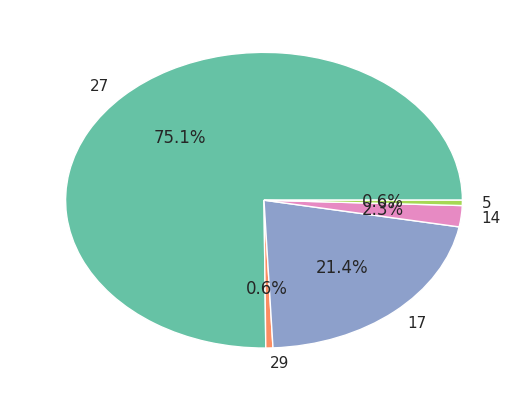

In [29]:
#predictmerge_tsv2.iloc[ft2.shape[1]+1:,:]
del merge_tsv2
#merged_tsv3.iloc[ft2.shape[1]+1:,:]=zscore(merged_tsv3.iloc[ft2.shape[1]+1:,:],axis=1)
predict_patient_classes=model1.predict(merged_tsv3.iloc[ft2.shape[1]+1:,:].values)
print(predict_patient_classes[:3])
del merged_tsv3
print(np.argmax(predict_patient_classes,axis=1))
pre_data=np.argmax(predict_patient_classes,axis=1).astype(np.int32)
del predict_patient_classes 
np.savetxt("TCGA-GBM.htseq_fpkm.csv",pre_data,delimiter=',')
c = collections.Counter(pre_data)
print(c)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set2')

c_d=dict(c)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.pie(c_d.values(), labels=c_d.keys(), autopct="%1.1f%%")

plt.show()
##モデルの形と違っているのでおこられている
#おそらくmergeのあとで変化、、ft2ではあってる）
#mergeチェック、これもkillされているのでもういちっどモデルからやり直す

In [ ]:
del tsv

## 以下参考
* 平均化確認のためのヒストグラム
* メモリ確認

(array([4.0493e+04, 2.8520e+03, 3.6960e+03, 2.2470e+03, 1.3650e+03,
        8.7500e+02, 5.3800e+02, 6.4300e+02, 1.8500e+02, 6.0000e+00]),
 array([0.        , 0.89427693, 1.78855385, 2.68283078, 3.57710771,
        4.47138464, 5.36566156, 6.25993849, 7.15421542, 8.04849234,
        8.94276927]),
 <a list of 10 Patch objects>)

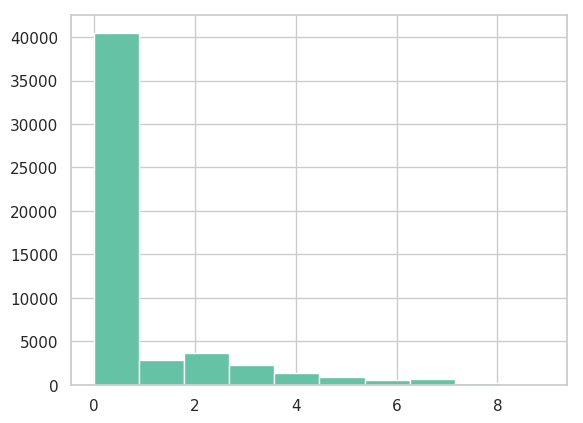

In [25]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

(array([4.0771e+04, 3.2950e+03, 3.6180e+03, 2.4480e+03, 8.0000e+02,
        9.6600e+02, 5.7800e+02, 3.9400e+02, 2.8000e+01, 2.0000e+00]),
 array([  0.        ,  21.0990017 ,  42.19800341,  63.29700511,
         84.39600682, 105.49500852, 126.59401023, 147.69301193,
        168.79201364, 189.89101534, 210.99001705]),
 <a list of 10 Patch objects>)

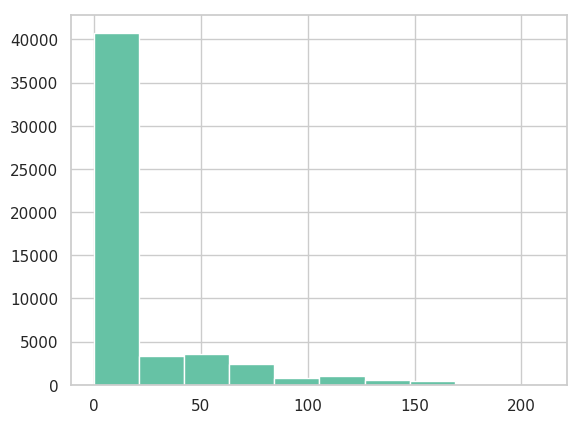

In [27]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

(array([4.0289e+04, 2.8640e+03, 3.7270e+03, 2.3030e+03, 1.4610e+03,
        8.4800e+02, 5.6300e+02, 6.4400e+02, 1.9600e+02, 5.0000e+00]),
 array([-0.59264485,  0.04633357,  0.68531199,  1.32429041,  1.96326883,
         2.60224725,  3.24122567,  3.88020408,  4.5191825 ,  5.15816092,
         5.79713934]),
 <a list of 10 Patch objects>)

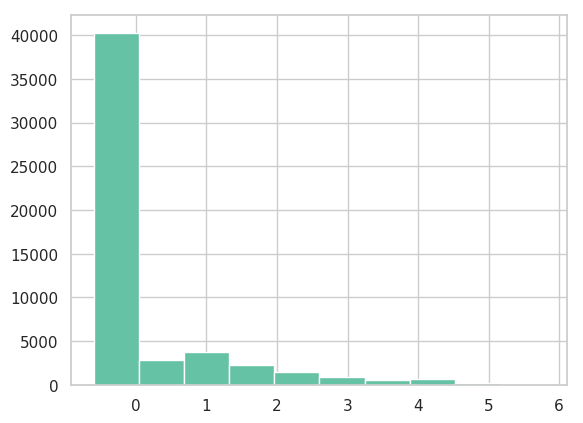

In [29]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

In [50]:
%matplotlib inline

In [25]:
import sys
print("{}{:>25}{:>10}{}".format('|','valuable name','|','memory','|'))
print("-------")
for var in dir():
    if not var.startswith("_") and sys.getsizeof(eval(var))>10000:
        print("{}{:>25}{:>10}{}".format('|',var,'|',sys.getsizeof(eval(var)),'|'))

|            valuable name         |memory
-------
|                   X_test         |1313778064
|                      df4         |2805232
|                      ft2         |5262837465
|                merge_tsv         |5457850489
|                   pred_y         |350752
|                      tsv         |209513216
|                   y_test         |701392


In [26]:
del merge_tsv